**Arquivo de entrada disponível em:** https://github.com/silvioedu/IGTI-MachileLearningBootcamp/blob/main/modulo_1/desafio/comp_bikes_mod.csv

# Configurações

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
sns.set()

In [84]:
filename = 'input/comp_bikes_mod.csv'
df = pd.read_csv(filename)

In [85]:
def plot_feature(df, feature):
  """ Plotar boxplot e distplot
  ----------------------------
  df     : dataframe
  feature: variável disponível
  """  
  fig, axes = plt.subplots(1,2, figsize=(18,5))
  plt.suptitle(f"Feature '{feature}'")

  sns.boxplot(df[feature],ax = axes[0])
  sns.distplot(df[feature], kde=False, ax = axes[1])
  plt.xlabel("")

def numeric_feature(df):
  """ Retornar as features numericas para analise
  ----------------------------
  df     : dataframe
  """  
  return [i for i in df.columns if not i.endswith("_id") and np.dtype(df[i]) in ('int64', 'float64')]

# Análise exploratória

## Geral

In [86]:
# quantas observações e variáeis estão disponíveis
df.shape

(17379, 17)

In [87]:
# como estão distribuídas as variáveis?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [88]:
# visualizando as primeiras linhas
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [89]:
# visualizando valores nuloes
df.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

## Por feature

In [90]:
num_ftr = numeric_feature(df)
print(f'Features numéricas {num_ftr}')

Features numéricas ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


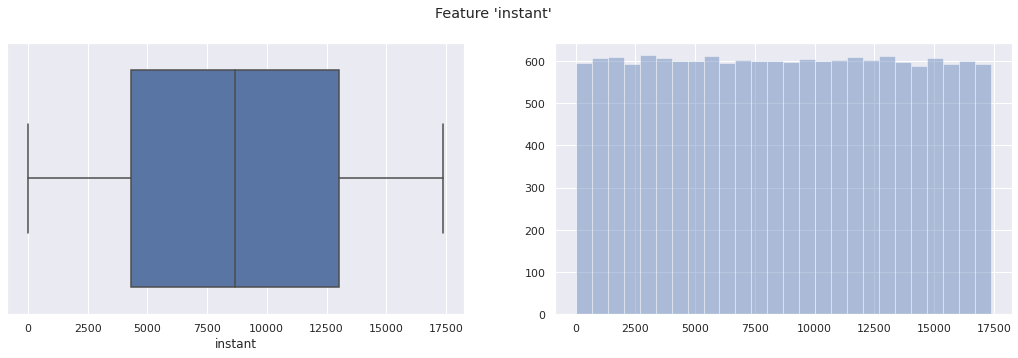

In [91]:
plot_feature(df, num_ftr[0])

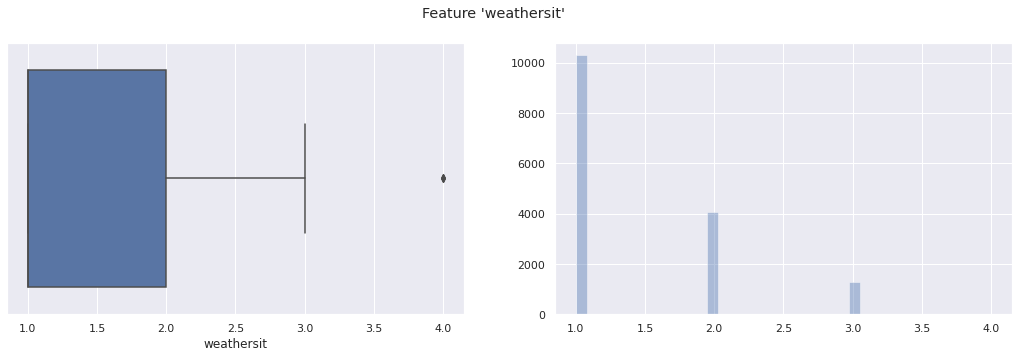

In [92]:
plot_feature(df, num_ftr[8])

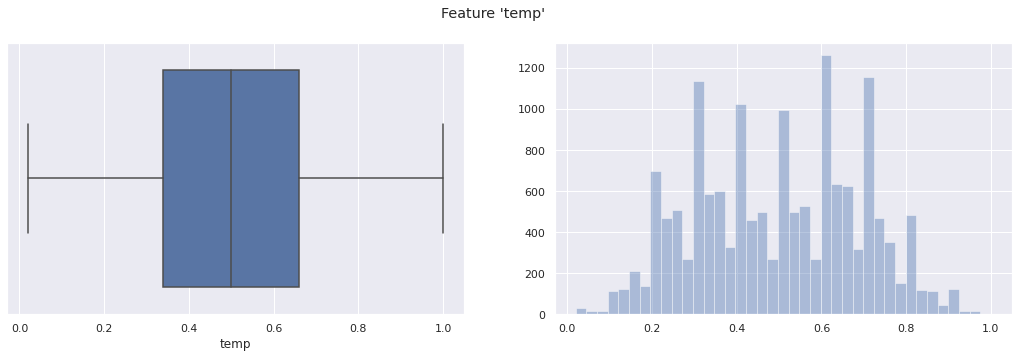

In [93]:
plot_feature(df, num_ftr[9])

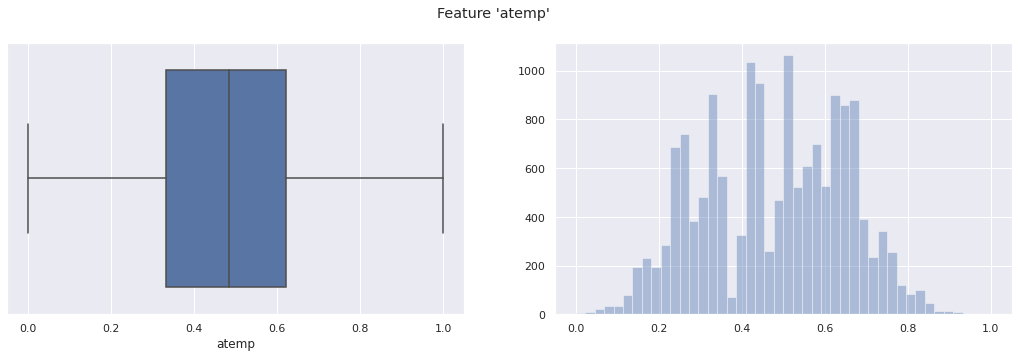

In [94]:
plot_feature(df, num_ftr[10])

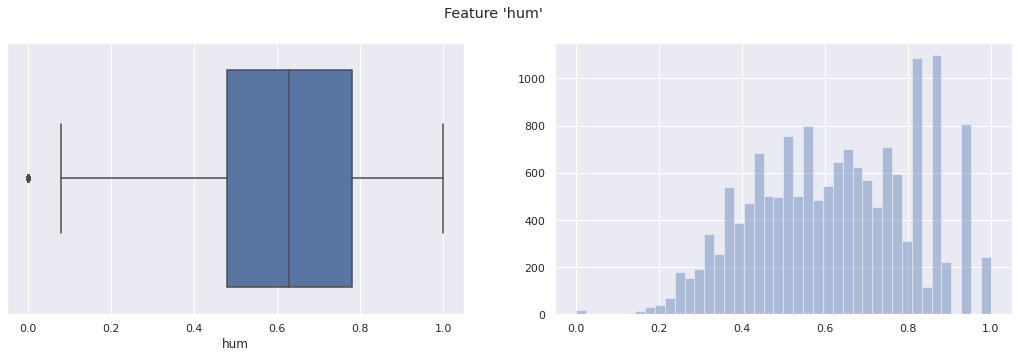

In [95]:
plot_feature(df, num_ftr[11])

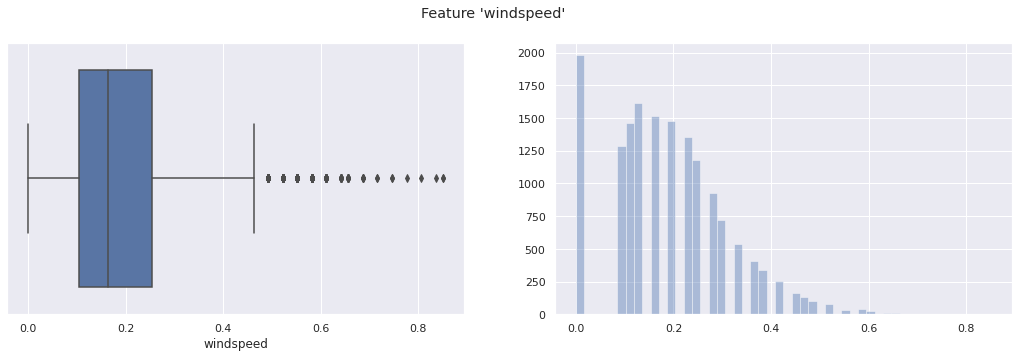

In [96]:
plot_feature(df, num_ftr[12])

## Relacionamento entre features

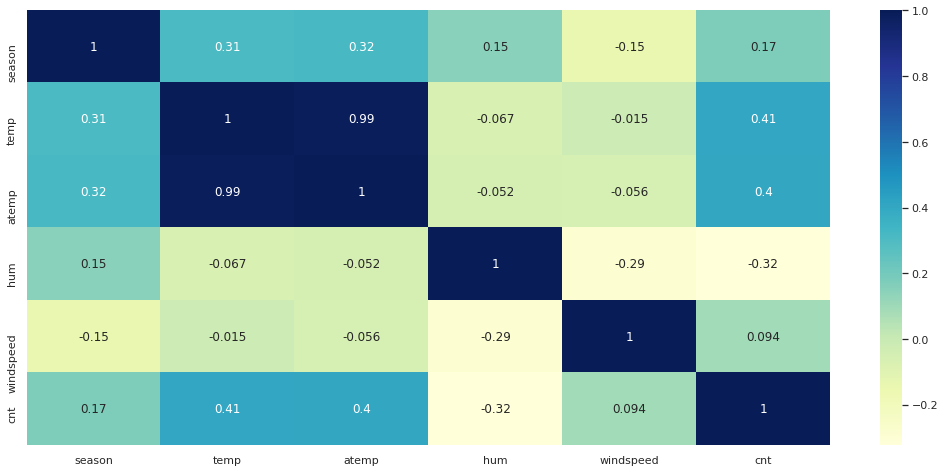

In [97]:
plt.figure(figsize=(18,8))
sns.heatmap(df[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap="YlGnBu")

# Pré-processamento

dteday

In [98]:
df.dropna(subset=['dteday'], inplace=True)
df.dteday.isnull().sum()

0

In [99]:
df.dteday = pd.to_datetime(df.dteday)

season

In [100]:
df.season = df.season.astype('category')
df.season.dtypes

CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=False)

# Preparando modelos e realizando previsões

In [101]:
df_train = df[['hum','casual','cnt']]
df_train.hum.fillna(df_train.hum.mean(), inplace=True)
df_train.casual.fillna(df_train.casual.mean(), inplace=True)
df_train.cnt.fillna(df_train.cnt.mean(), inplace=True)
df_train.isnull().sum()

hum       0
casual    0
cnt       0
dtype: int64

In [102]:
x = df_train[['hum', 'casual']]
Y = df_train['cnt']

## Linear Regression

In [103]:
lr = LinearRegression()
lr.fit(x, Y)
y_pred = lr.predict(x)
print(f'Score R2: {np.round(r2_score(Y, y_pred),5)}')

Score R2: 0.40599


## Decision Tree Regressor

In [104]:
dtr = DecisionTreeRegressor()
dtr.fit(x, Y)
y_pred = dtr.predict(x)
print(f'Score R2: {np.round(r2_score(Y, y_pred),5)}')

Score R2: 0.70983


### Support Vector Machine Regressor

In [105]:
svr = SVR(kernel='rbf')
svr.fit(x, Y)
y_pred = svr.predict(x)
print(f'Score R2: {np.round(r2_score(Y, y_pred),5)}')

Score R2: 0.4018
